<a href="https://colab.research.google.com/github/PurabPatel555/VentilatorManeuverExtraction/blob/main/VentExtract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn import svm
from sklearn.preprocessing import normalize

In [ ]:
train_names_true = os.listdir('/content/drive/My Drive/Maneuvers')
train_names_false = os.listdir('/content/drive/My Drive/ManeuversWrong')

In [ ]:
X = []
Y = []
for train_name_true in train_names_true:
  x = np.genfromtxt(os.path.join("/content/drive/My Drive/Maneuvers", train_name_true), dtype=str, deletechars="b'")
  x = np.transpose(x)
  x = x[3][1:]
  x = x.astype(float)
  X.append(x)
  Y.append(1)
for train_name_false in train_names_false:
  x = np.genfromtxt(os.path.join("/content/drive/My Drive/ManeuversWrong", train_name_false), dtype=str, deletechars="b'")
  x = np.transpose(x)
  x = x[3][1:]
  x = x.astype(float)
  X.append(x)
  Y.append(0)

In [ ]:
X = normalize(X, norm='max', axis=1)

In [ ]:
clf = svm.SVC()
clf.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
x_extract = np.genfromtxt(os.path.join("/content/drive/My Drive/ManeuversRaw", "Rb10-DuBDPS.ASC"), dtype=str, deletechars="b'")

ValueError: ignored

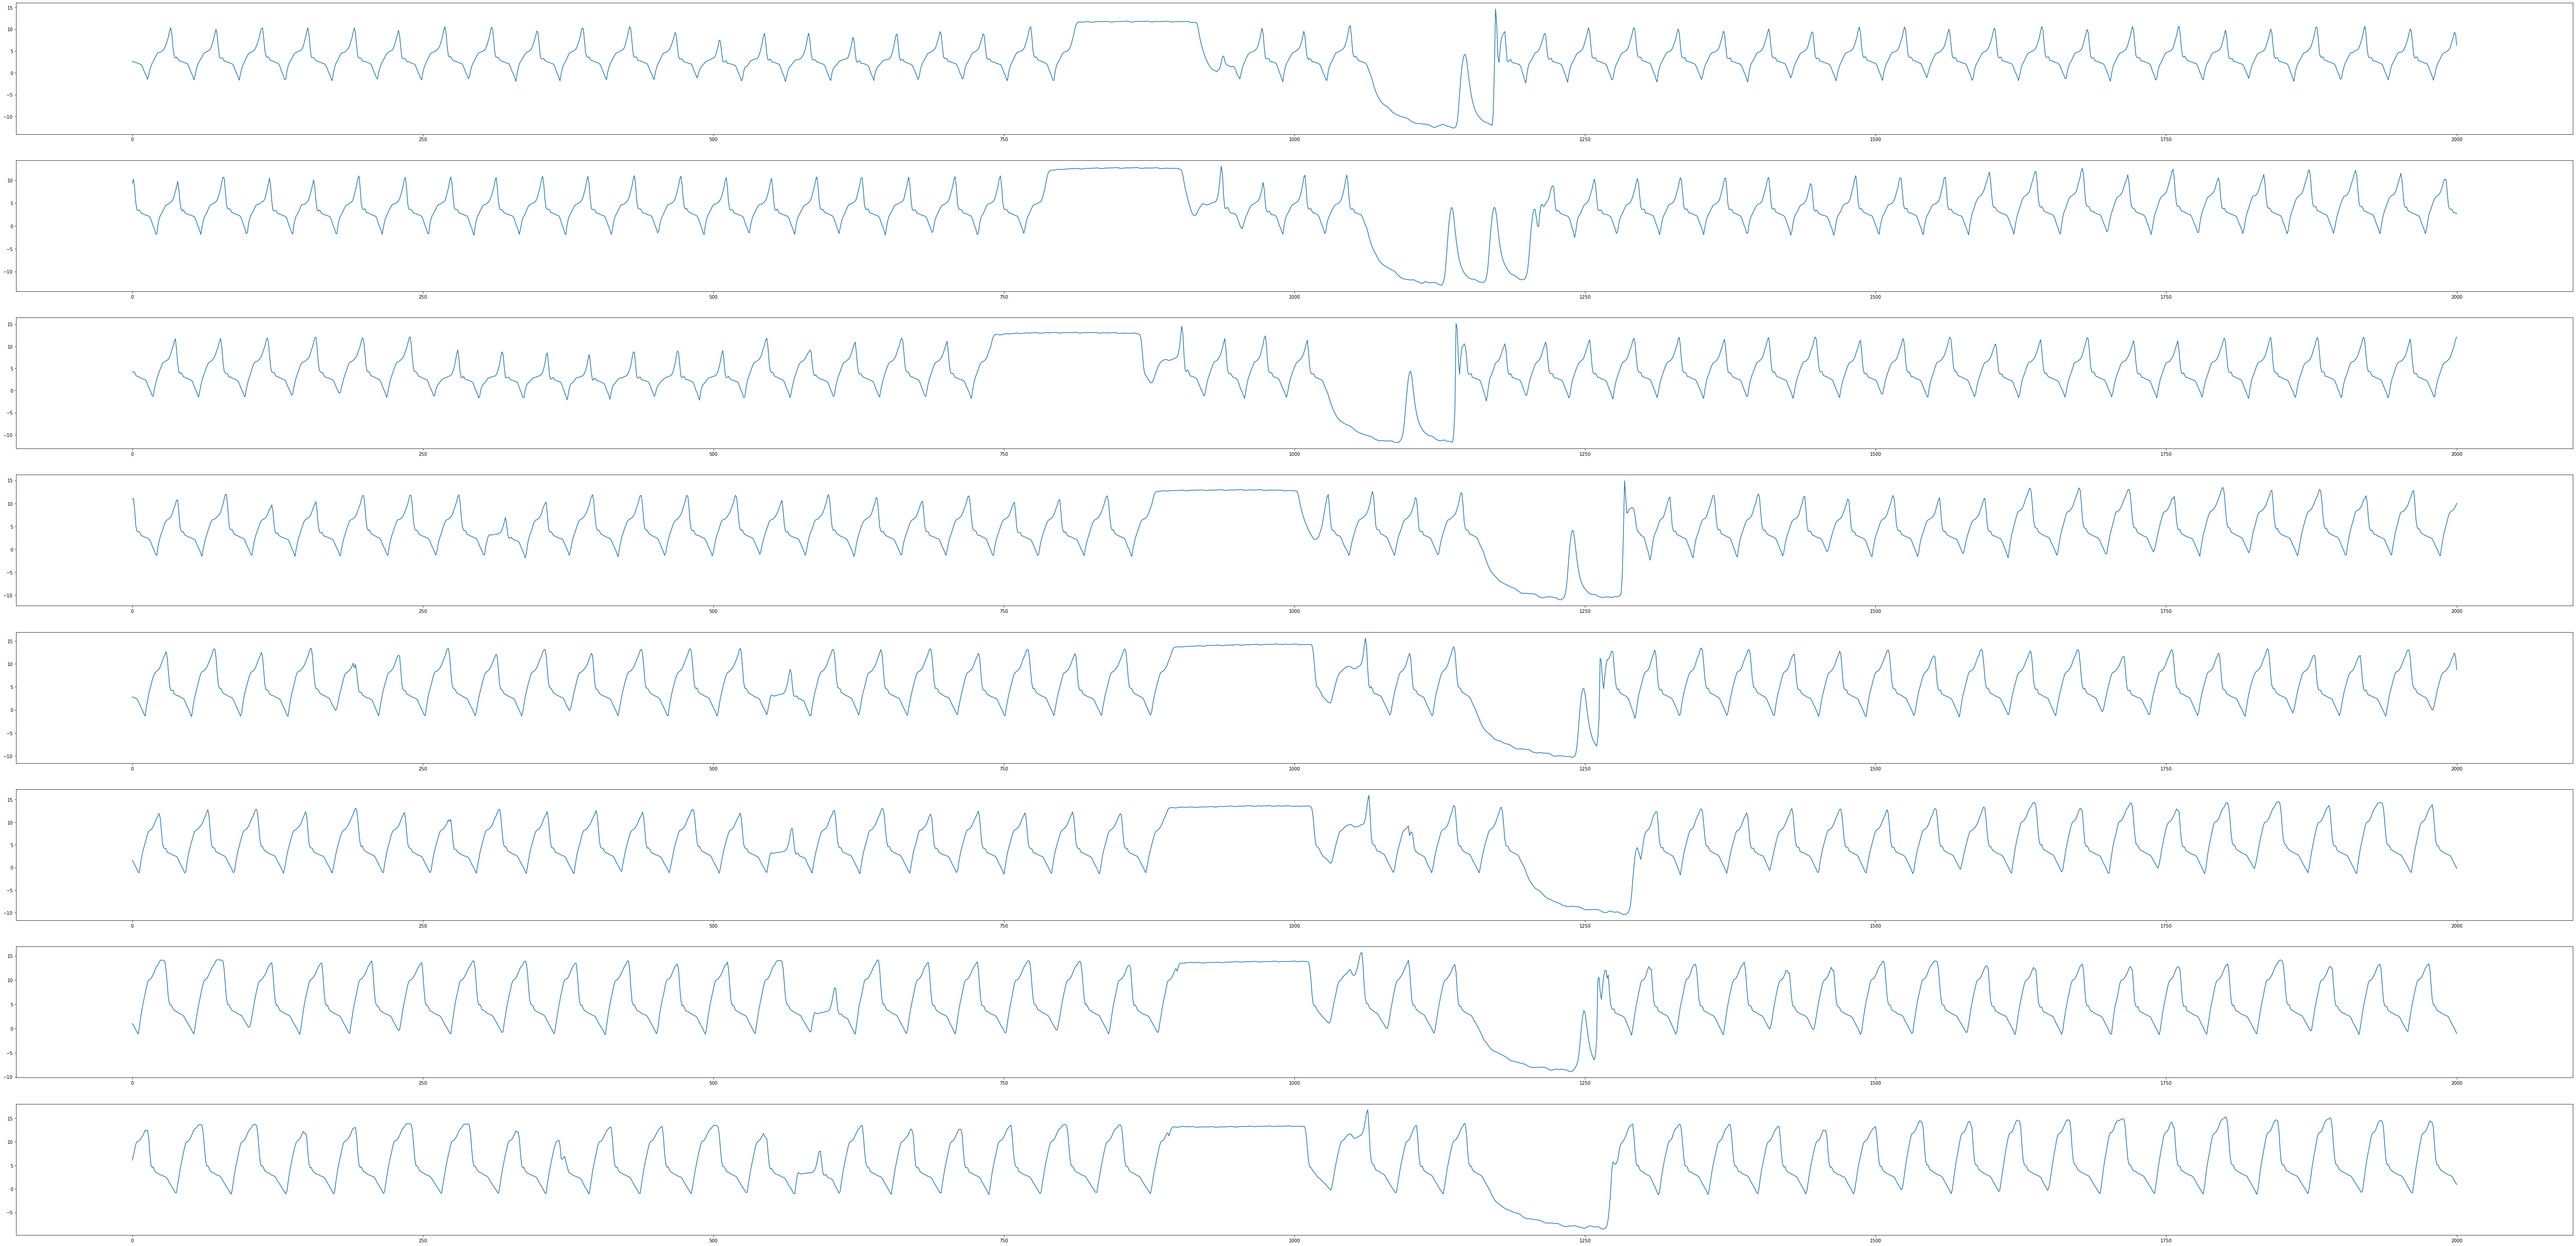

In [ ]:
x = np.transpose(x_extract)
x = x[:,1:]
x = x.astype(float)
id = 0 
id_extract = []
plotnum = 0
fig = plt.figure(figsize=(100, 100))
while True:
  xx = x[3,id:(id+2001)]
  if (clf.predict(normalize([xx], norm='max', axis=1))==1):
    id = id+250
    plotnum = plotnum+1
    plt.subplot(16,1,plotnum)
    plt.plot(xx)
    id_extract.append(id)
    id = id+4000
  else:
    id = id+250


In [ ]:
run = np.genfromtxt(os.path.join("/content/drive/My Drive/ManeuversRaw", "Rb13-R1LH.ASC"), dtype=str, deletechars="b'")
run = np.transpose(run)
for start in id_extract:
  run_sample = np.hstack((np.transpose([run[:,0]]), run[:,id:(id+2001)]))
  print(run_sample)
  np.savetxt(('/content/drive/My Drive/ManeuversRaw/'+str(start)+'.ASC'), np.transpose(run_sample), fmt='%s')